In [36]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split

data_train= pd.read_csv("train.csv")
data_test= pd.read_csv("test.csv")

In [37]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [38]:
data_train.shape,data_test.shape

((891, 12), (418, 11))

# Preprocessing

In [39]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
data_train = data_train.dropna(subset=["Embarked"])
data_test = data_test.dropna(subset=["Fare"])

# Name

In [41]:
train_test_data = [data_train, data_test]
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [42]:
data_train['Title'].value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [43]:
for dataset in train_test_data:
    # Replace some titles with more common titles
    dataset["Title"] = dataset["Title"].replace(['Mlle', 'Ms'], 'Miss')
    dataset["Title"] = dataset["Title"].replace('Mme', 'Mrs')
    # Replace values that are not in the ("Mr", "Miss", "Mrs", "Master") titles with "Rare", else keep the value
    dataset["Title"] = ["Rare" if value not in ["Mr", "Miss", "Mrs", "Master"] else value for value in dataset["Title"]]

# delete unnecessary feature from dataset
data_train.drop(['Ticket','Name'], axis=1, inplace=True)
data_test.drop(['Ticket','Name'], axis=1, inplace=True)

In [44]:
data_train.replace(["female","male"],[0,1],inplace=True)
data_train.replace(["C","S","Q"],[0,1,2],inplace=True)
data_train["Age"].fillna(data_train.groupby("Title")["Age"].transform("median"), inplace=True)
data_test.replace(["female","male"],[0,1],inplace=True)
data_test.replace(["C","S","Q"],[0,1,2],inplace=True)
data_test["Age"].fillna(data_test.groupby("Title")["Age"].transform("median"), inplace=True)


In [45]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [46]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [47]:
data_train["Cabin"].fillna(data_train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
data_test["Cabin"].fillna(data_test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [48]:
data_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [49]:
data_train.replace(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'],[0,1,2,3,4],inplace=True)
data_test.replace(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'],[0,1,2,3,4],inplace=True)

In [50]:
data_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,7.2500,2.0,1,0
1,2,1,1,0,38.0,1,0,71.2833,0.8,0,1
2,3,1,3,0,26.0,0,0,7.9250,2.0,1,2
3,4,1,1,0,35.0,1,0,53.1000,0.8,1,1
4,5,0,3,1,35.0,0,0,8.0500,2.0,1,0
5,6,0,3,1,30.0,0,0,8.4583,2.0,2,0
6,7,0,1,1,54.0,0,0,51.8625,1.6,1,0
7,8,0,3,1,2.0,3,1,21.0750,2.0,1,3
8,9,1,3,0,27.0,0,2,11.1333,2.0,1,1
9,10,1,2,0,14.0,1,0,30.0708,1.8,0,1


In [65]:
data_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
PassengerId,1.000000,-0.005028,-0.035330,0.043136,0.040311,-0.057686,-0.001657,0.012703,-0.037735,-0.017487,-0.023664
Survived,-0.005028,1.000000,-0.335549,-0.541585,-0.083817,-0.034040,0.083151,0.255290,-0.274985,-0.126753,0.405078
Pclass,-0.035330,-0.335549,1.000000,0.127741,-0.350958,0.081656,0.016824,-0.548193,0.864176,0.307324,-0.118595
Sex,0.043136,-0.541585,0.127741,1.000000,0.110289,-0.116348,-0.247508,-0.179958,0.086865,0.023175,-0.564014
Age,0.040311,-0.083817,-0.350958,0.110289,1.000000,-0.264994,-0.187232,0.095027,-0.309581,-0.066795,-0.282136
SibSp,-0.057686,-0.034040,0.081656,-0.116348,-0.264994,1.000000,0.414542,0.160887,0.070307,0.031095,0.270439
Parch,-0.001657,0.083151,0.016824,-0.247508,-0.187232,0.414542,1.000000,0.217532,0.013944,-0.035756,0.268780
Fare,0.012703,0.255290,-0.548193,-0.179958,0.095027,0.160887,0.217532,1.000000,-0.575547,-0.269588,0.139572
Cabin,-0.037735,-0.274985,0.864176,0.086865,-0.309581,0.070307,0.013944,-0.575547,1.000000,0.323641,-0.116459
Embarked,-0.017487,-0.126753,0.307324,0.023175,-0.066795,0.031095,-0.035756,-0.269588,0.323641,1.000000,0.020633


# Model

In [66]:
X=data_train[['Pclass','Sex','Fare','Cabin','Embarked','Title']]
Y=data_train[['Survived']]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [69]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),  #  input layer
  tf.keras.layers.Dense(36, activation=tf.keras.activations.relu),    #  hidden layer 1
  tf.keras.layers.Dense(18, activation=tf.keras.activations.relu),    #  hidden layer 2
  tf.keras.layers.Dense(2, activation='softmax')     # output layer
])

In [70]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [71]:
output=model.fit(X_train,Y_train,epochs=500)

Epoch 1/500
23/23 [==============================] - 1s 2ms/step - loss: 0.9872 - accuracy: 0.6034
Epoch 2/500
23/23 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.6554
Epoch 3/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.6864
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.6807
Epoch 5/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.6920
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.6920
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.7075
Epoch 8/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.6878
Epoch 9/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7173
Epoch 10/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.7089
Epoch 11/

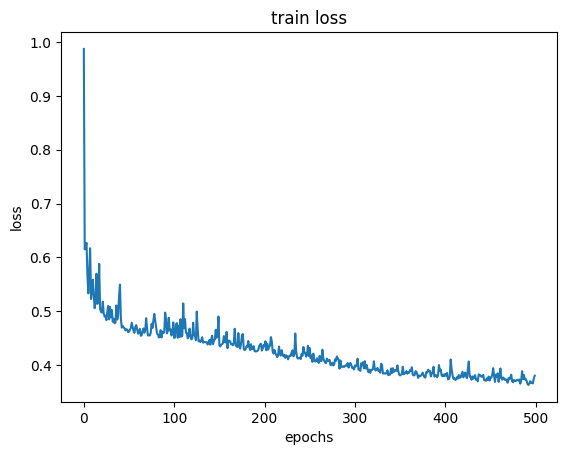

In [76]:
plt.plot(output.history["loss"])
plt.title("train loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

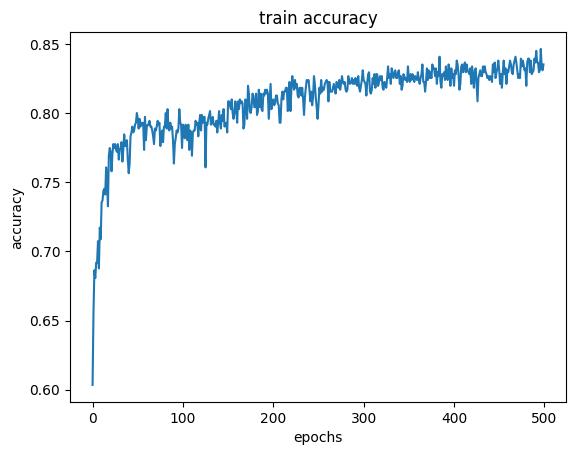

In [77]:
plt.plot(output.history["accuracy"])
plt.title("train accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [74]:
model.save("/content/drive/MyDrive/dataset/titanic.h5")

In [78]:
loss,accuracy=model.evaluate(X_test,Y_test)

print(f"loss test: {loss}       accuracy test: {accuracy}")

6/6 [==============================] - 0s 4ms/step - loss: 0.4685 - accuracy: 0.8371
loss test: 0.4685337543487549       accuracy test: 0.8370786309242249
